<img style="float:left" src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a7/IE_Business_School_logo.svg/1200px-IE_Business_School_logo.svg.png?20200427113546" width="500"/>

## XAVIER HERNAN SAMPER
#### COMPUTER VISION INDIVIDUAL ASSIGNMENT

* [0. Project Description](#0)
* [1. Import General Libraries](#1)
  * [1.1 Initial Checking](#1.1)
* [2. Object Detection - YOLOv8s.pt](#2)
  * [2.1 Import Dataset from Roboflow](#2.1)
  * [2.2 Train YOLOv8s.pt](#2.2)
  * [2.3 Validate YOLOv8s.pt](#2.3)
  * [2.4 Predict YOLOv8s.pt](#2.4)
* [3. Object Detection - YOLOv8m.pt](#3)
  * [3.1 Import Dataset from Roboflow](#3.1)
  * [3.2 Train YOLOv8m.pt](#3.2)
  * [3.3 Validate YOLOv8m.pt](#3.3)
  * [3.4 Predict YOLOv8m.pt](#3.4)
* [4. Object Detection - YOLOv8l.pt](#4)
  * [4.1 Import Dataset from Roboflow](#4.1)
  * [4.2 Train YOLOv8l.pt](#4.2)
  * [4.3 Validate YOLOv8l.pt](#4.3)
  * [4.4 Predict YOLOv8l.pt](#4.4)
* [5. Object Detection - YOLOv5](#5)
  * [5.1 Installing the YOLOv5 Environment](#5.1)
  * [5.2 Import Dataset from Roboflow](#5.2)
  * [5.3 Train YOLOv5](#5.3)
  * [5.4 Evaluate YOLOv5](#5.4)
* [6. Conclusions](#6)

<a id='0'></a>
## 0. Project Description

This project was developed by Xavier Hernan in the MBD April intake in 2022 as a Computer Vision individual assignment. The initial data and task was taken from PIKTOR dataset available from the following github:

https://github.com/ciber-lab/pictor-ppe#dataset

This notebook includes all the steps of the process of building an object detection pipeline: Training, validation, test, based on YOLOv8.

Before importing data from Roboflow, I performed several steps. I uploaded images to a project called 'xavi-assignment' and added three .txt files containing annotations for the images, categorizing them into Hat (0), Vest (1), and Worker (2). Some images were manually annotated as they were not previously labeled. Then, I added an augmentation technique of horizontal flip to my model. The images were divided into 76% training, 14% validation, and 10% test sets using a train-test split. All the images were flipped horizontally and vertically, and cropped with 0% Minimum Zoom and 20% Maximum Zoom.

Finally, I exported the dataset in the appropiate format for each case.

### · Data Sources:

-----------------
**YOLOv8**

The following link provides a comprehensive overview of the YOLOv8 model, including various resources to comprehend its workings and usage.

Link: https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset/

The following link features a step-by-step video tutorial on building a YOLOv8 model, based on the notebook mentioned in the article.

Link: https://www.youtube.com/watch?v=wuZtUMEiKWY&feature=youtu.be


-----------------
**YOLOv5**

The following link provides a comprehensive overview of the YOLOv5 model, including various resources to comprehend its workings and usage. Navegating withinh the website is it possible to reack code and clarifications.

Link: https://roboflow.com/model/yolov5

-----------------

<a id='1'></a>
## 1. Import General Libraries

Roboflow and Ultralytics libraries are intalled in here. Also I check the status of the installed software and its dependencies.

In [1]:
!pip install roboflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.0/49.0 KB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 4.0 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=7717a9741afd9c60a06a112533c4e8886e02afc02dba95aa8ce1f46036dd5e84
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pypars

In [2]:
!pip install ultralytics==8.0.11

#Check the status of the installed software and its dependencies
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.11 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.6/78.2 GB disk)


In [1]:
#Import pandas
import pandas as pd

#Import numpy
import numpy as np

# Import derivates ultralytics
from ultralytics import YOLO
from IPython.display import display, Image

# Import matplotlib
import matplotlib.pyplot as plt

#Import Roboflow
from roboflow import Roboflow

#Import os
import os

#Import glob
import glob

#Functions from the IPython
from IPython.display import Image, display

<a id='1.1'></a>
### 1.1 Initial Checking

Running **!nvidia-smi** to display the current status of the NVIDIA GPUs in the system, including the GPU utilization, temperature, memory usage, and power consumption.

In [4]:
!nvidia-smi

Fri Feb  3 18:38:33 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P0    28W /  70W |      3MiB / 15360MiB |      5%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
import os
HOME = os.getcwd()
print(HOME)

/content


<a id= '2'></a>
## 2. Object Detection - YOLOv8s.pt

<a id= '2.1'></a>
### 2.1 Import Dataset from Roboflow

This code has been taken from the export site of roboflow. The first line **%cd {HOME}** sets the current working directory to the home directory. Same code will be used for following models to be trained.

After this, it creates an instance of it with the API key **AeQawE2luCK6NpaA9hPL** and it retrieves the project xavi-assignment from the workspace computer-vision-f69jp and the dataset version 2 from that project. Finally, it downloads the dataset with the label format "yolov8".

In [6]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

rf = Roboflow(api_key="AeQawE2luCK6NpaA9hPL")
project = rf.workspace("computer-vision-f69jp").project("xavi-assignment")
dataset = project.version(2).download("yolov8")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to xavi-assignment-2 in yolov8:: 100%|██████████| 3564/3564 [00:01<00:00, 2300.32it/s]


<a id='2.2'></a>
### 2.2 Train YOLOv8s.pt

Here I am running a shell command yolo with various parameters to training an Object detection Model based on YOLOv8. 

The hyperparameters selected are:
- **task** with value detect to specify the task as object detection.
- **mode** with value train to specify training a new model.
- **model** with value 'yolov8s.pt' as the name of the model file.
- **data** with value 'data.yaml' following its path to the file. 
- **epochs** with value 30 as many lower values have been trained and they were not performing as good as this.
- **imgsz** with value 750 to resize the images.
- **dropout** with value 0.5 for dropping out randomly 50% of the neurons in a neural network layer as in previous versions I faced overfitting (mainly with Vest(1) detection).
- **nms** with value 0.5 will make the algorithm suppress the bounding boxes with a confidence score below 0.5 (keeping the higher). This will help me to reduce the number of multiple detections for the same object.

I would have also loved to try models with more parameters but because of the computational cost it have and the limited time I had to avoid doing so. My next steps would have been applying **learning rate** to ensures that my model updates its weights effectively. I also could have tryied with the **batch size** for a faster convergence. Also, a different **optimizer type** to update the model's weights so it could have improved performance. Finally, another thing that I would have liked to do is changing **number of hidden layers** to improve the model's ability to learn complex relationships, but I didn't do that because finding the optimal one is not an easy task, as it takes long time of try and error (because using too many layers could result in overfitting).

In [7]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=30 imgsz=750  dropout=0.5 nms=0.5 plots=True

/content
100% 21.5M/21.5M [00:02<00:00, 10.8MB/s]

Ultralytics YOLOv8.0.11 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/xavi-assignment-2/data.yaml, epochs=30, patience=50, batch=16, imgsz=750, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.5, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=

#### · Plotting Outputs:

Here I am plotting four different graphs for showing the optput of the Object Detection model. These are: **F1 curve**, **Precision curve**, **Precision&Recall curve**, and **Recall curve**.

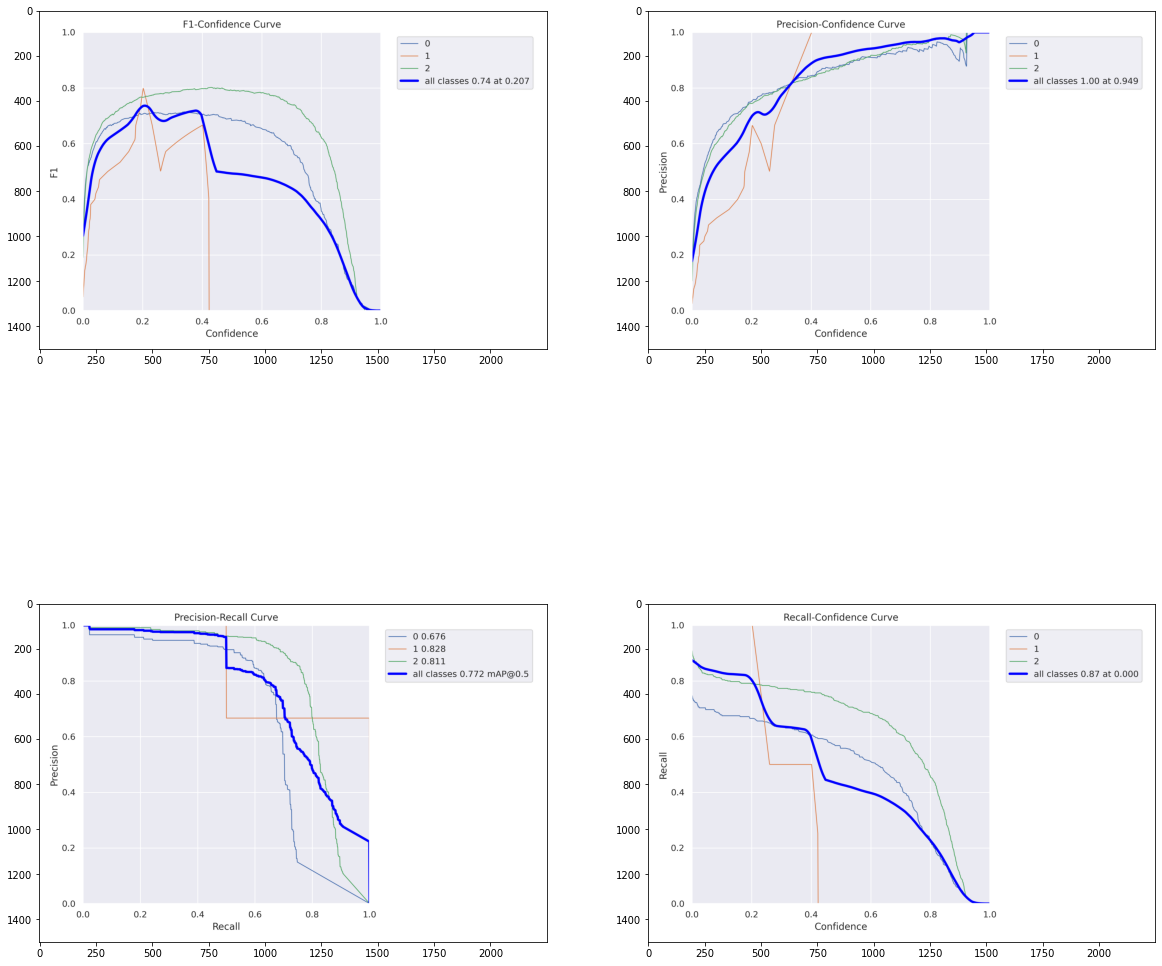

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(20, 20))
axs[0, 0].imshow(plt.imread('./runs/detect/train/F1_curve.png'))
axs[0, 1].imshow(plt.imread('./runs/detect/train/P_curve.png'))
axs[1, 0].imshow(plt.imread('./runs/detect/train/PR_curve.png'))
axs[1, 1].imshow(plt.imread('./runs/detect/train/R_curve.png'))
plt.show()

Then I plotted the confusion matrix of the model to see how well the model is performing in terms of accuracy and identifying the correct classes or categories.

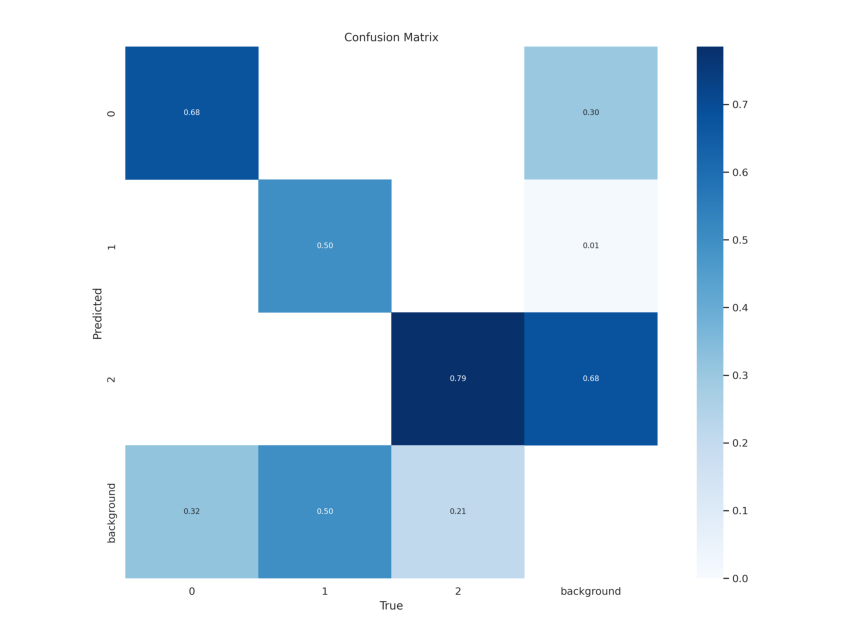

In [9]:
fig = plt.figure(dpi=200)
plt.imshow(plt.imread('./runs/detect/train/confusion_matrix.png'))
plt.axis('off')
plt.show()

Finally, the key metrics monitored by YOLOv8 were also displayed here.

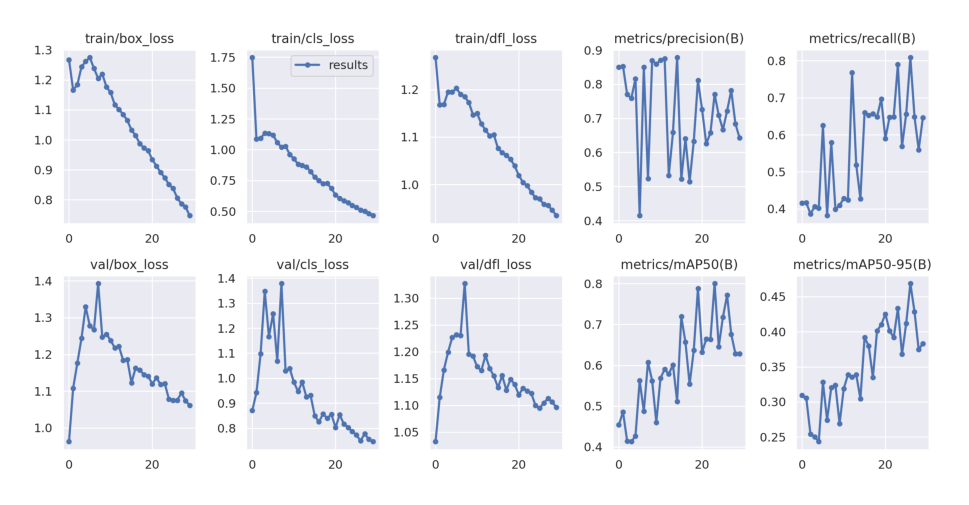

In [10]:
fig = plt.figure(dpi=200)
plt.imshow(plt.imread('./runs/detect/train/results.png'))
plt.axis('off')
plt.show()

<a id='2.3'></a>
### 2.3 Validate YOLOv8s.pt

This is the validation mode on a pre-trained model. The chosen validation mode indicates that the algorithm will be evaluated on a validation set and the performance metrics will be reported, rather than making predictions on new data.

In [11]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.11 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing... 
Model summary: 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/xavi-assignment-2/valid/labels.cache... 157 images, 0 backgrounds, 0 corrupt: 100% 157/157 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 10/10 [00:05<00:00,  1.85it/s]
                   all        157        811       0.67      0.629      0.644      0.368
                     0        157        317      0.776      0.628       0.65      0.407
                     1        157          4      0.464        0.5      0.484      0.154
                     2        157        490      0.772      0.758      0.799      0.542
Speed: 3.6ms pre-process, 10.5ms inference, 0.0ms loss, 2.3ms post-process per image


<a id='2.4'></a>
### 2.4 Predict YOLOv8s.pt

The code runs the prediction mode on a pre-trained model. The algorithm is tasked with detecting objects in a set of images, with a **confidence threshold** of 0'25. 

In [12]:
%cd {HOME}

!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.11 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing... 
Model summary: 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
image 1/116 /content/datasets/xavi-assignment-2/test/images/image_from_china-1006-_jpg.rf.fcffc35f7df46be0dbfbeddb60da2f37.jpg: 640x640 5 0s, 6 2s, 17.1ms
image 2/116 /content/datasets/xavi-assignment-2/test/images/image_from_china-1015-_jpg.rf.b908086696208f5cb853fd9b5fe27a6e.jpg: 640x640 4 0s, 7 2s, 17.2ms
image 3/116 /content/datasets/xavi-assignment-2/test/images/image_from_china-1067-_jpg.rf.0137ad485cbe02a2605d5ec05bce81df.jpg: 640x640 1 0, 1 2, 17.1ms
image 4/116 /content/datasets/xavi-assignment-2/test/images/image_from_china-1088-_jpg.rf.f6c4e2dbc1c35d59b86fe8967ce2f195.jpg: 640x640 1 0, 4 2s, 17.1ms
image 5/116 /content/datasets/xavi-assignment-2/test/images/image_from_china-1127-_jpg.rf.4641a82acaafceee8bd7f318ec6aa8b1.jpg: 640x640 1 0, 3 2s, 17.1ms
image 6/116 /content/datasets/xavi-assignment-2/t

#### · Plotting Outputs:

I am plotting some outputs to evaluate the model's performance and view examples.

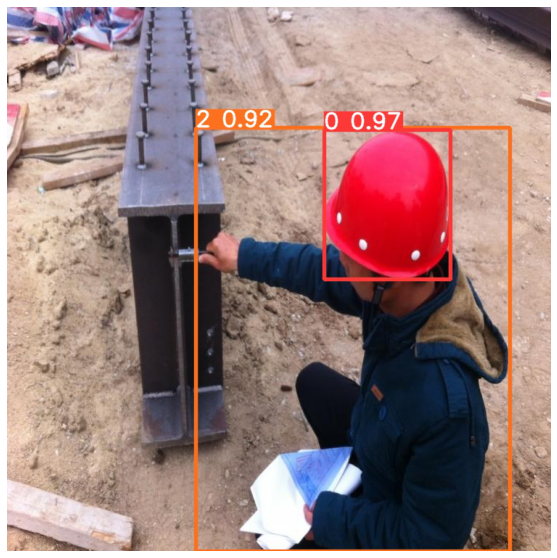

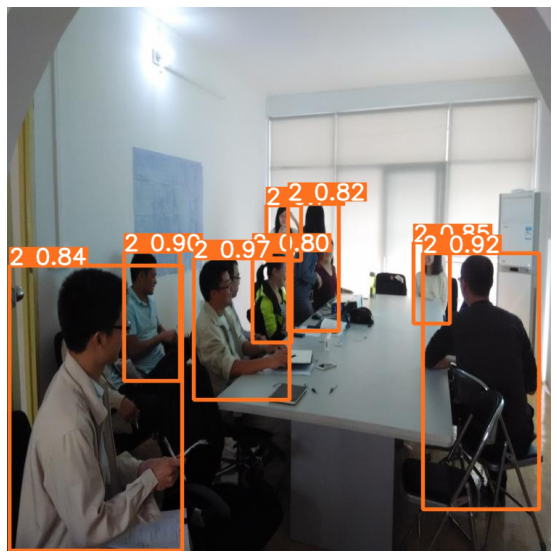

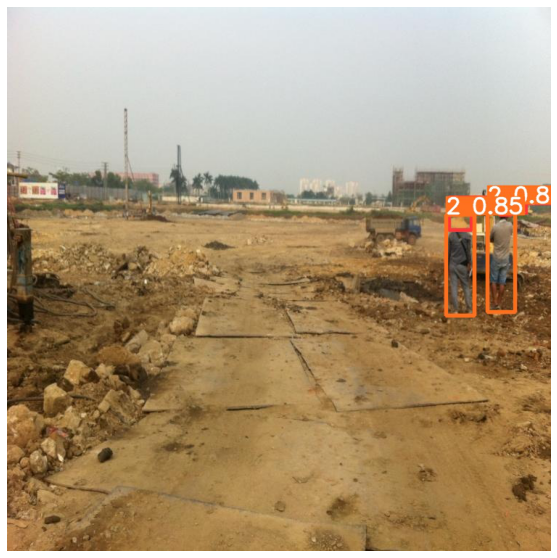

In [13]:
image_paths = glob.glob(f'/content/runs/detect/predict/*.jpg')[:3]

for image_path in image_paths:
    image = plt.imread(image_path)
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

<a id= '3'></a>
## 3. Object Detection - YOLOv8m.pt

To make a fair comparison while experimenting with different neural networks, I will use now 'yolov8m.pt' model for comparing it with the previuos one and see how the performance have changed.

<a id='3.1'></a>
### 3.1 Import dataset from Roboflow

It creates an instance of it with the API key **AeQawE2luCK6NpaA9hPL** and it retrieves the project xavi-assignment from the workspace computer-vision-f69jp and the dataset version 2 from that project. Finally, it downloads the dataset with the label format "yolov8".

In [14]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

rf = Roboflow(api_key="AeQawE2luCK6NpaA9hPL")
project = rf.workspace("computer-vision-f69jp").project("xavi-assignment")
dataset = project.version(2).download("yolov8")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to xavi-assignment-2 in yolov8:: 100%|██████████| 3564/3564 [00:02<00:00, 1579.46it/s]


<a id='3.2'></a>
### 3.2 Train YOLOv8m.pt

Here I am running the same shell command yolo as before tunning the **model** to the medium one. All others remain the same. I did that in order to compare both models in the same conditions.

The hyperparameters selected are:
- **task** with value detect to specify the task as object detection.
- **mode** with value train to specify training a new model.
- **model** with value 'yolov8m.pt' as the name of the model file.
- **data** with value 'data.yaml' following its path to the file. 
- **epochs** with value 30 as many lower values have been trained and they were not performing as good as this.
- **imgsz** with value 750 to resize the images.
- **dropout** with value 0.5 for dropping out randomly 50% of the neurons in a neural network layer as in previous versions I faced overfitting (mainly with Vest(1) detection).
- **nms** with value 0.5 will make the algorithm suppress the bounding boxes with a confidence score below 0.5 (keeping the higher). This will help me to reduce the number of multiple detections for the same object.

I would have also loved to try models with more parameters but because of the computational cost it have and the limited time I had to avoid doing so. My next steps would have been applying **learning rate** to ensures that my model updates its weights effectively. I also could have tryied with the **batch size** for a faster convergence. Also, a different **optimizer type** to update the model's weights so it could have improved performance. Finally, another thing that I would have liked to do is changing **number of hidden layers** to improve the model's ability to learn complex relationships, but I didn't do that because finding the optimal one is not an easy task, as it takes long time of try and error (because using too many layers could result in overfitting).

In [15]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=30 imgsz=750  dropout=0.5 nms=0.5 plots=True

/content
100% 49.7M/49.7M [00:01<00:00, 28.4MB/s]

Ultralytics YOLOv8.0.11 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/datasets/xavi-assignment-2/data.yaml, epochs=30, patience=50, batch=16, imgsz=750, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.5, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=

#### · Plotting Outputs:

Here I am plotting four different graphs for showing the optput of the Object Detection model. These are: **F1 curve**, **Precision curve**, **Precision&Recall curve**, and **Recall curve**.

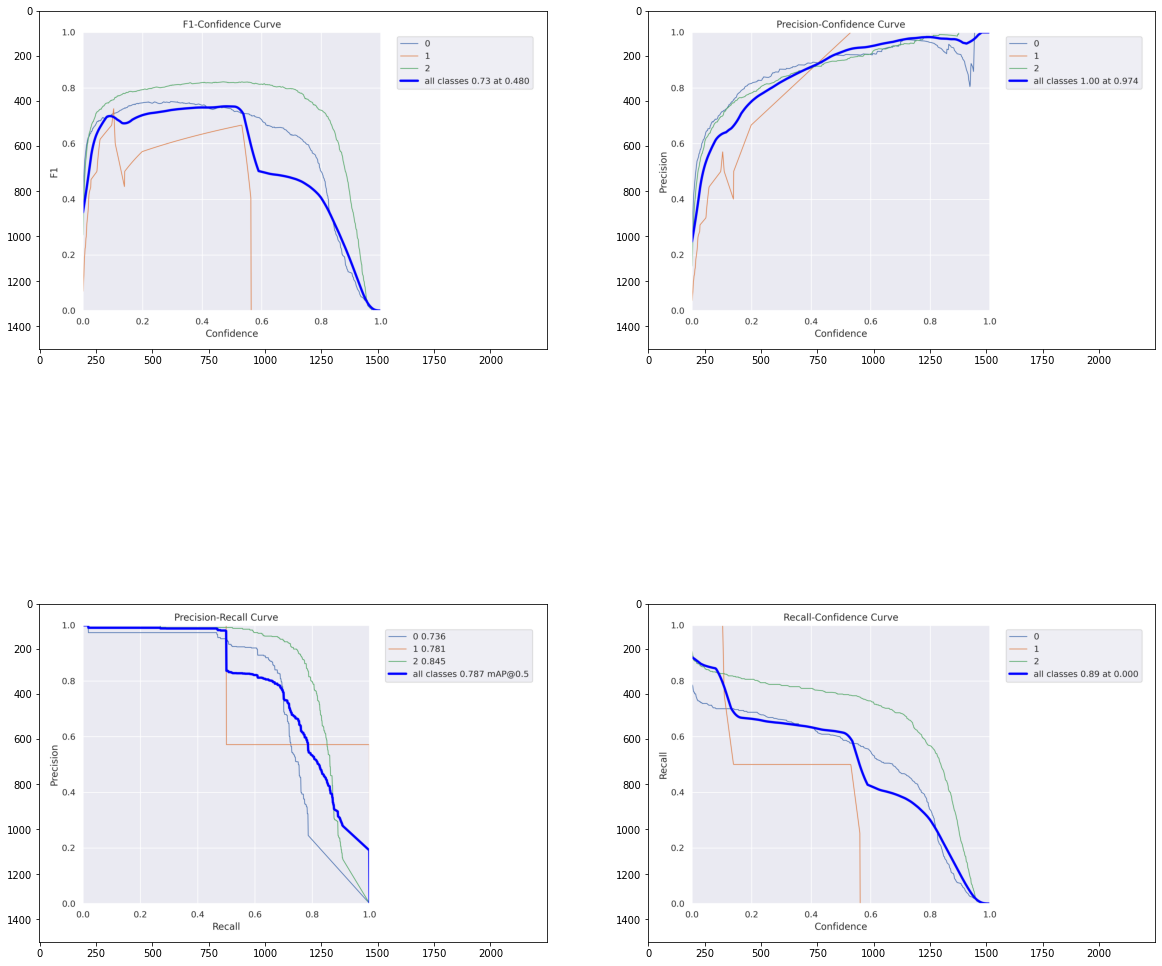

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(20, 20))
axs[0, 0].imshow(plt.imread('./runs/detect/train2/F1_curve.png'))
axs[0, 1].imshow(plt.imread('./runs/detect/train2/P_curve.png'))
axs[1, 0].imshow(plt.imread('./runs/detect/train2/PR_curve.png'))
axs[1, 1].imshow(plt.imread('./runs/detect/train2/R_curve.png'))
plt.show()

Then I plotted the confusion matrix of the model to see how well the model is performing in terms of accuracy and identifying the correct classes or categories.

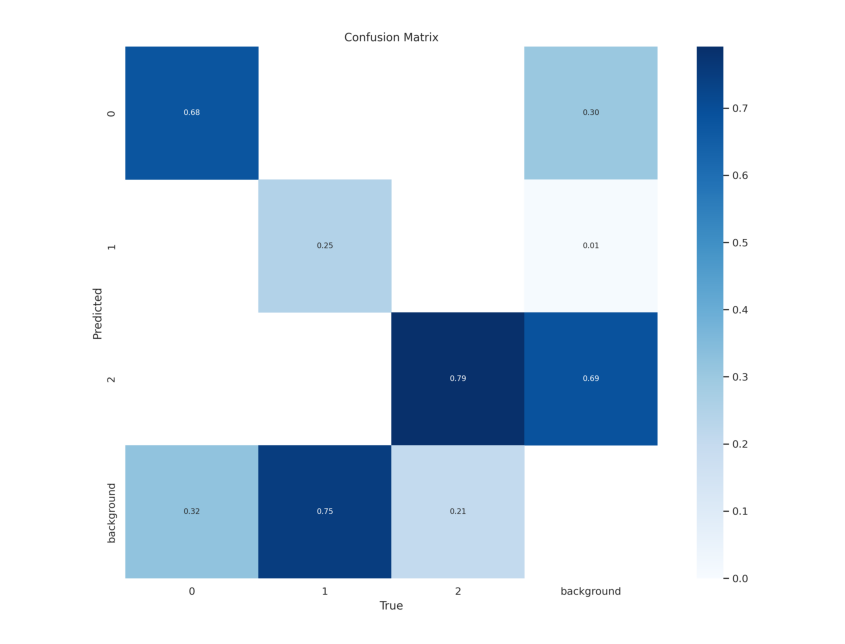

In [17]:
fig = plt.figure(dpi=200)
plt.imshow(plt.imread('./runs/detect/train2/confusion_matrix.png'))
plt.axis('off')
plt.show()

Finally, the key metrics monitored by YOLOv8 were also displayed here.

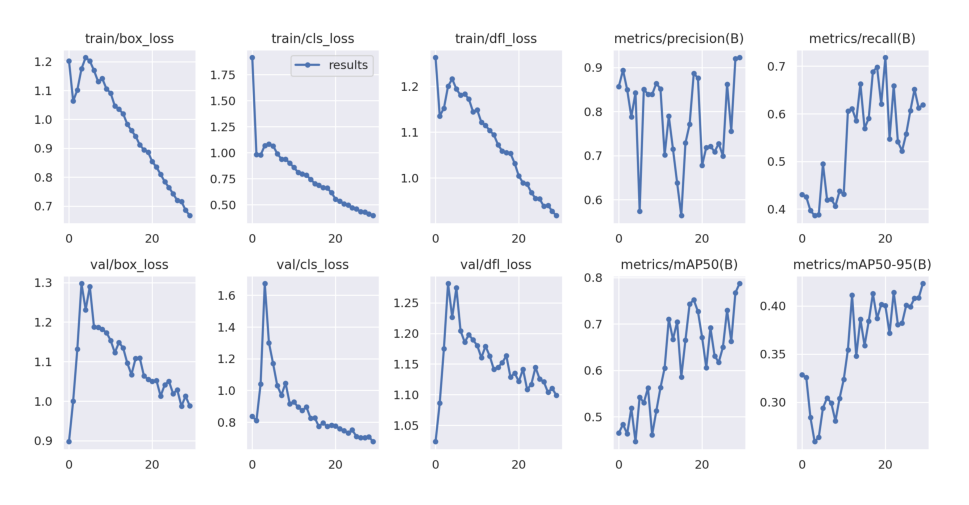

In [18]:
fig = plt.figure(dpi=200)
plt.imshow(plt.imread('./runs/detect/train2/results.png'))
plt.axis('off')
plt.show()

<a id='3.3'></a>
### 3.3 Validate YOLOv8m.pt

This is the validation mode on a pre-trained model. The chosen validation mode indicates that the algorithm will be evaluated on a validation set and the performance metrics will be reported, rather than making predictions on new data.

In [19]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.11 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing... 
Model summary: 218 layers, 25841497 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/datasets/xavi-assignment-2/valid/labels.cache... 157 images, 0 backgrounds, 0 corrupt: 100% 157/157 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 10/10 [00:07<00:00,  1.38it/s]
                   all        157        811        0.9      0.595      0.768      0.421
                     0        157        317      0.902      0.558       0.69      0.447
                     1        157          4      0.901        0.5      0.781      0.229
                     2        157        490      0.899      0.727      0.834      0.587
Speed: 2.7ms pre-process, 25.0ms inference, 0.0ms loss, 1.7ms post-process per image


<a id='3.4'></a>
### 3.4 Predict YOLOv8m.pt

The code runs the prediction mode on a pre-trained model. The algorithm is tasked with detecting objects in a set of images, with a **confidence threshold** of 0'25. 

In [20]:
%cd {HOME}

!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.11 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing... 
Model summary: 218 layers, 25841497 parameters, 0 gradients, 78.7 GFLOPs
image 1/116 /content/datasets/xavi-assignment-2/test/images/image_from_china-1006-_jpg.rf.fcffc35f7df46be0dbfbeddb60da2f37.jpg: 640x640 4 0s, 5 2s, 38.1ms
image 2/116 /content/datasets/xavi-assignment-2/test/images/image_from_china-1015-_jpg.rf.b908086696208f5cb853fd9b5fe27a6e.jpg: 640x640 4 0s, 5 2s, 35.1ms
image 3/116 /content/datasets/xavi-assignment-2/test/images/image_from_china-1067-_jpg.rf.0137ad485cbe02a2605d5ec05bce81df.jpg: 640x640 1 0, 1 2, 35.0ms
image 4/116 /content/datasets/xavi-assignment-2/test/images/image_from_china-1088-_jpg.rf.f6c4e2dbc1c35d59b86fe8967ce2f195.jpg: 640x640 2 0s, 1 2, 35.1ms
image 5/116 /content/datasets/xavi-assignment-2/test/images/image_from_china-1127-_jpg.rf.4641a82acaafceee8bd7f318ec6aa8b1.jpg: 640x640 1 0, 4 2s, 27.8ms
image 6/116 /content/datasets/xavi-assignment-2/t

#### · Plotting Outputs:

I am plotting some outputs to evaluate the model's performance and view examples.

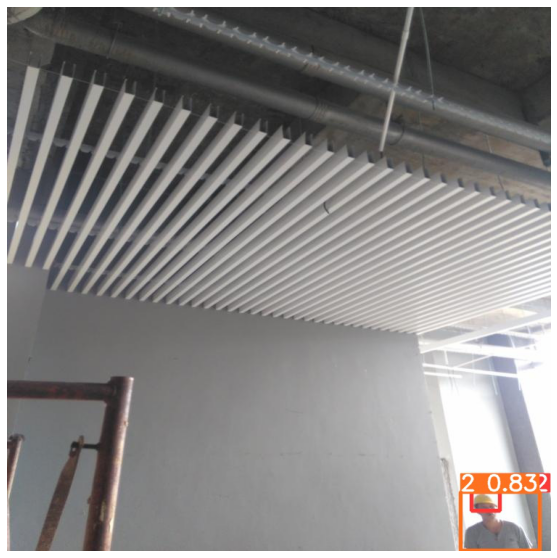

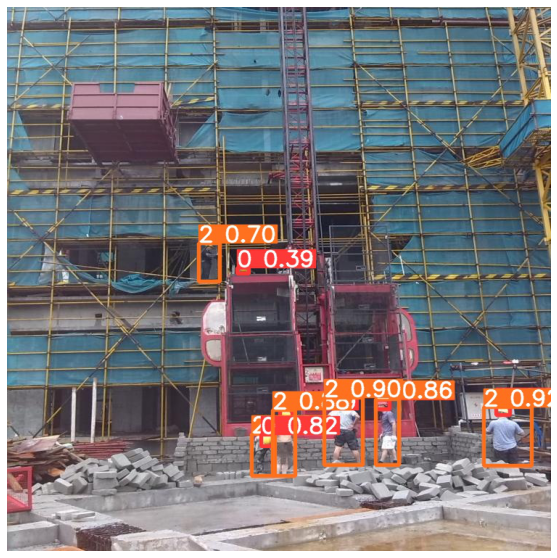

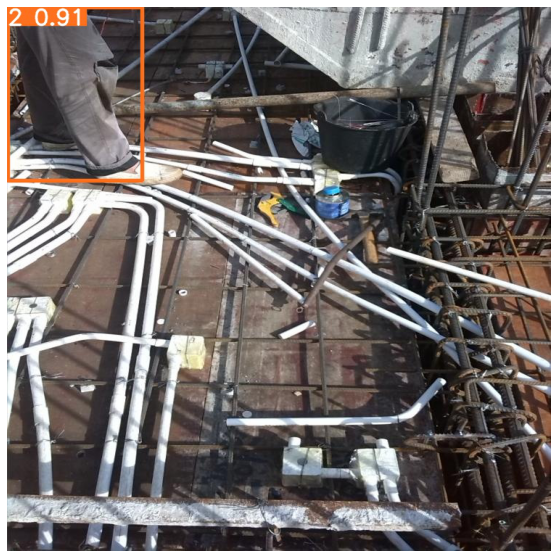

In [3]:
image_paths = glob.glob(f'/content/runs/detect/predict2/*.jpg')[:3]

for image_path in image_paths:
    image = plt.imread(image_path)
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

<a id= '4'></a>
## 4. Object Detection - YOLOv8l.pt

To make a fair comparison while experimenting with different neural networks, I will use now 'yolov8l.pt' model for comparing it with the previuos one and see how the performance have changed.

<a id='4.1'></a>
### 4.1 Import dataset from Roboflow

It creates an instance of it with the API key **AeQawE2luCK6NpaA9hPL** and it retrieves the project xavi-assignment from the workspace computer-vision-f69jp and the dataset version 2 from that project. Finally, it downloads the dataset with the label format "yolov8".

In [22]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

rf = Roboflow(api_key="AeQawE2luCK6NpaA9hPL")
project = rf.workspace("computer-vision-f69jp").project("xavi-assignment")
dataset = project.version(2).download("yolov8")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to xavi-assignment-2 in yolov8:: 100%|██████████| 3564/3564 [00:02<00:00, 1544.42it/s]


<a id='4.2'></a>
### 4.2 Train YOLOv8l.pt

Again, I am running a shell command yolo but now with a third different model, the large one. I will compare at the end the scoring of all of them.

The hyperparameters selected are:
- **task** with value detect to specify the task as object detection.
- **mode** with value train to specify training a new model.
- **model** with value 'yolov8l.pt' as the name of the model file.
- **data** with value 'data.yaml' following its path to the file. 
- **epochs** with value 30 as many lower values have been trained and they were not performing as good as this.
- **imgsz** with value 750 to resize the images.
- **dropout** with value 0.5 for dropping out randomly 50% of the neurons in a neural network layer as in previous versions I faced overfitting (mainly with Vest(1) detection).
- **nms** with value 0.5 will make the algorithm suppress the bounding boxes with a confidence score below 0.5 (keeping the higher). This will help me to reduce the number of multiple detections for the same object.

I would have also loved to try models with more parameters but because of the computational cost it have and the limited time I had to avoid doing so. My next steps would have been applying **learning rate** to ensures that my model updates its weights effectively. I also could have tryied with the **batch size** for a faster convergence. Also, a different **optimizer type** to update the model's weights so it could have improved performance. Finally, another thing that I would have liked to do is changing **number of hidden layers** to improve the model's ability to learn complex relationships, but I didn't do that because finding the optimal one is not an easy task, as it takes long time of try and error (because using too many layers could result in overfitting).

In [23]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8l.pt data={dataset.location}/data.yaml epochs=30 imgsz=750  dropout=0.5 nms=0.5 plots=True

/content
100% 83.7M/83.7M [00:02<00:00, 39.8MB/s]

Ultralytics YOLOv8.0.11 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/datasets/xavi-assignment-2/data.yaml, epochs=30, patience=50, batch=16, imgsz=750, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.5, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=

#### · Plotting Outputs:

Here I am plotting four different graphs for showing the optput of the Object Detection model. These are: **F1 curve**, **Precision curve**, **Precision&Recall curve**, and **Recall curve**.

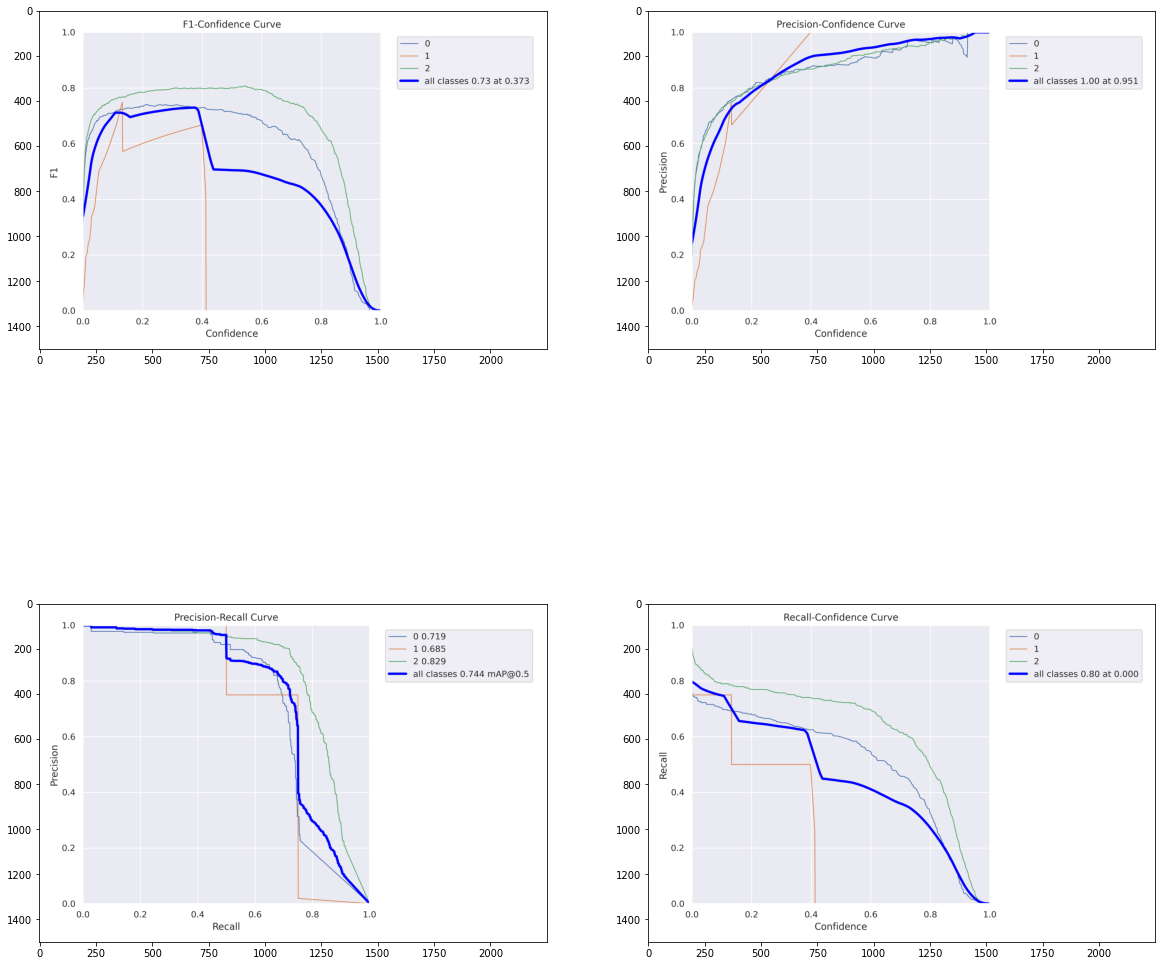

In [24]:
fig, axs = plt.subplots(2, 2, figsize=(20, 20))
axs[0, 0].imshow(plt.imread('./runs/detect/train3/F1_curve.png'))
axs[0, 1].imshow(plt.imread('./runs/detect/train3/P_curve.png'))
axs[1, 0].imshow(plt.imread('./runs/detect/train3/PR_curve.png'))
axs[1, 1].imshow(plt.imread('./runs/detect/train3/R_curve.png'))
plt.show()

Then I plotted the confusion matrix of the model to see how well the model is performing in terms of accuracy and identifying the correct classes or categories.

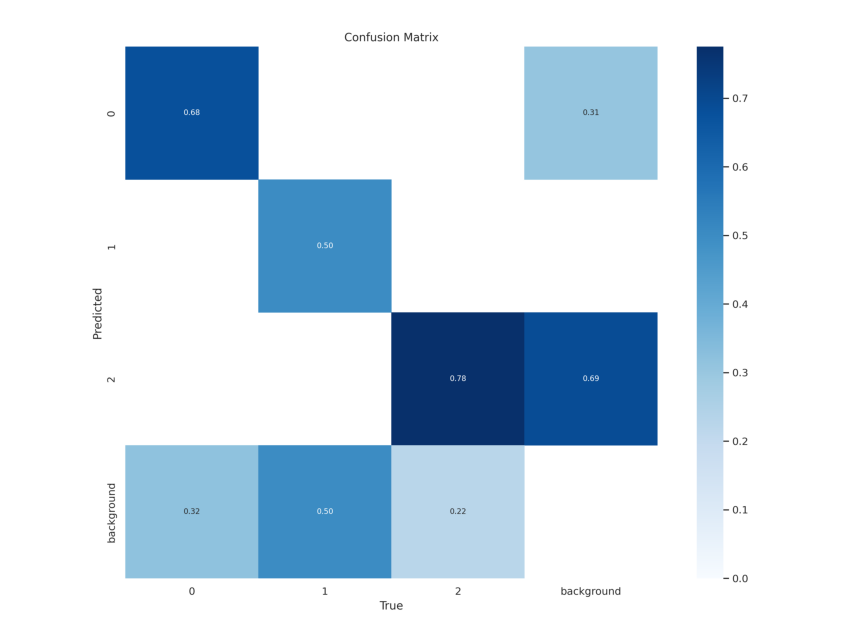

In [25]:
fig = plt.figure(dpi=200)
plt.imshow(plt.imread('./runs/detect/train3/confusion_matrix.png'))
plt.axis('off')
plt.show()

Finally, the key metrics monitored by YOLOv8 were also displayed here.

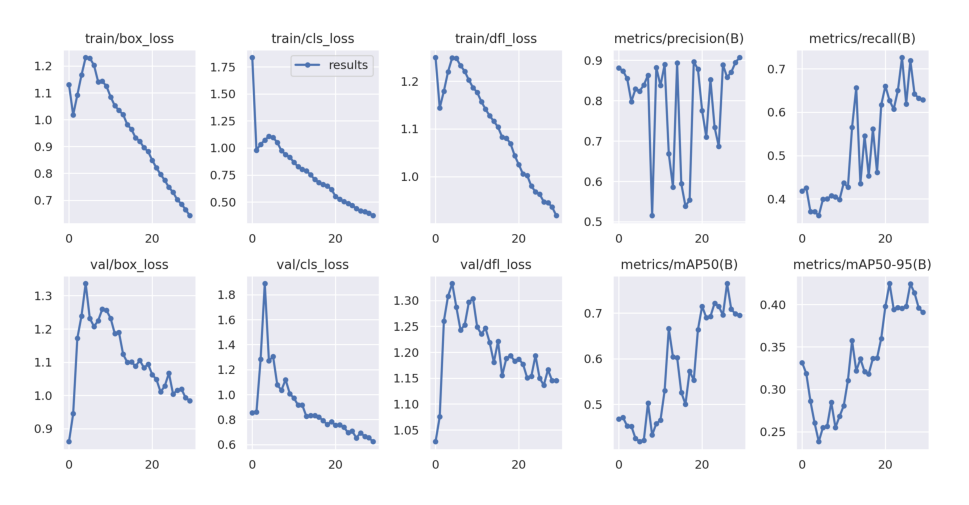

In [26]:
fig = plt.figure(dpi=200)
plt.imshow(plt.imread('./runs/detect/train3/results.png'))
plt.axis('off')
plt.show()

<a id='4.3'></a>
### 4.3 Validate YOLOv8l.pt

This is the validation mode on a pre-trained model. The chosen validation mode indicates that the algorithm will be evaluated on a validation set and the performance metrics will be reported, rather than making predictions on new data.

In [27]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train3/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.11 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing... 
Model summary: 268 layers, 43608921 parameters, 0 gradients, 164.8 GFLOPs
val: Scanning /content/datasets/xavi-assignment-2/valid/labels.cache... 157 images, 0 backgrounds, 0 corrupt: 100% 157/157 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 10/10 [00:09<00:00,  1.06it/s]
                   all        157        811      0.858      0.602      0.726      0.424
                     0        157        317      0.872      0.587      0.685       0.45
                     1        157          4      0.841        0.5      0.685      0.255
                     2        157        490      0.861       0.72      0.808      0.565
Speed: 2.4ms pre-process, 39.5ms inference, 0.0ms loss, 2.1ms post-process per image


<a id='4.4'></a>
### 4.4 Predict YOLOv8l.pt

The code runs the prediction mode on a pre-trained model. The algorithm is tasked with detecting objects in a set of images, with a **confidence threshold** of 0'25. 

In [28]:
%cd {HOME}

!yolo task=detect mode=predict model={HOME}/runs/detect/train3/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.11 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing... 
Model summary: 268 layers, 43608921 parameters, 0 gradients, 164.8 GFLOPs
image 1/116 /content/datasets/xavi-assignment-2/test/images/image_from_china-1006-_jpg.rf.fcffc35f7df46be0dbfbeddb60da2f37.jpg: 640x640 4 0s, 5 2s, 64.5ms
image 2/116 /content/datasets/xavi-assignment-2/test/images/image_from_china-1015-_jpg.rf.b908086696208f5cb853fd9b5fe27a6e.jpg: 640x640 4 0s, 6 2s, 52.1ms
image 3/116 /content/datasets/xavi-assignment-2/test/images/image_from_china-1067-_jpg.rf.0137ad485cbe02a2605d5ec05bce81df.jpg: 640x640 1 0, 1 2, 43.8ms
image 4/116 /content/datasets/xavi-assignment-2/test/images/image_from_china-1088-_jpg.rf.f6c4e2dbc1c35d59b86fe8967ce2f195.jpg: 640x640 1 0, 1 2, 42.9ms
image 5/116 /content/datasets/xavi-assignment-2/test/images/image_from_china-1127-_jpg.rf.4641a82acaafceee8bd7f318ec6aa8b1.jpg: 640x640 1 0, 3 2s, 38.9ms
image 6/116 /content/datasets/xavi-assignment-2/t

#### · Plotting Outputs:

I am plotting some outputs to evaluate the model's performance and view examples.

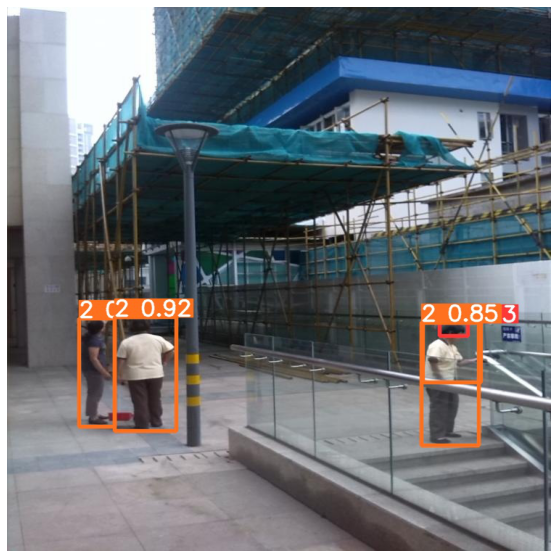

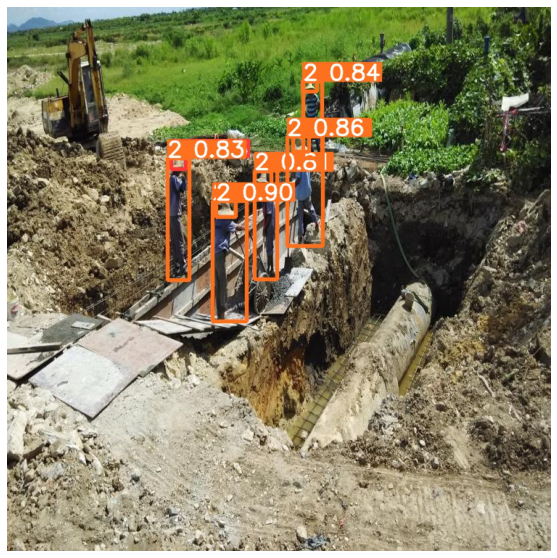

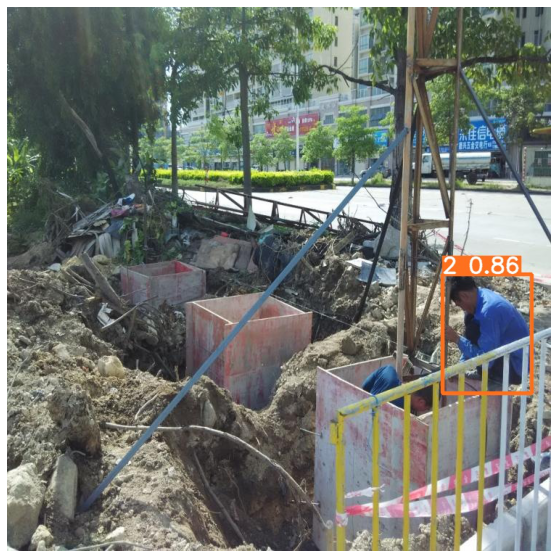

In [2]:
image_paths = glob.glob(f'/content/runs/detect/predict3/*.jpg')

for image_path in image_paths[-3:]:
    image = plt.imread(image_path)
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

<a id= '5'></a>
## 5. Object Detection - YOLOv5 

Now, I decided to experiment a bit and try to train a YOLOv5. To make a fair comparison between YOLOv8 and this earlier version, I will try to compare the results of this one with the previous ones using similar parameters, but not the same.

<a id= '5.1'></a>
### 5.1 Installing the YOLOv5 Environment

Here I am going to clone the YOLOv5 repo, intall the nedeed requirements and also at the end I will print some information regarding the enviroment.



In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 15005, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 15005 (delta 0), reused 0 (delta 0), pack-reused 15002
Receiving objects: 100% (15005/15005), 14.09 MiB | 33.16 MiB/s, done.
Resolving deltas: 100% (10285/10285), done.
/content/yolov5
Setup complete. Using torch 1.13.1+cu116 (Tesla T4)


<a id= '5.2'></a>
### 5.2 Import Dataset from Roboflow

I am importing again the same dataset as used in the previous models. Eventhough the versions of the files may look different, all of them are the same. 

In [ ]:
from roboflow import Roboflow
rf = Roboflow(model_format="yolov5", notebook="ultralytics")

upload and label your dataset, and get an API KEY here: https://app.roboflow.com/?model=yolov5&ref=ultralytics


I set up here enviromen for the datasets directory, where the project will be saved.

In [ ]:
os.environ["DATASET_DIRECTORY"] = "/content/datasets2"

In [ ]:
rf = Roboflow(api_key="AeQawE2luCK6NpaA9hPL")
project = rf.workspace("computer-vision-f69jp").project("xavi-assignment")
dataset = project.version(2).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to /content/datasets2/xavi-assignment-2 in yolov5pytorch:: 100%|██████████| 3564/3564 [00:02<00:00, 1720.90it/s]


<a id= '5.3'></a>
### 5.3 Train YOLOv5

This code runs the training script for YOLOv5 model. The parameters selected have been:
- The parameter **img** sets the size of the input images that are resized to 750 pixels. 
- The parameter **batch** sets the batch size for the training to 16. The model will be trained on 16 samples at a time.
- The parameter **epochs** specifies the number of training epochs to be run, which I decided to set 50 as in many different documentations I saw it use to be much higher than in YOLOv8 so I tried to compare them as equal as possible. 
- Then I specified the **data** location of the data used for training and is has been read from the file. 
- The **weights** yolov5s.pt parameter sets the initial weights for the model, as they are defined in the file.
- Finally **cache** stores the annotations in memory for faster training.

In [ ]:
!python train.py --img 750 --batch 16 --epochs 50 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/datasets2/xavi-assignment-2/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=750, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hs

<a id= '5.4'></a>
### 5.4 Evaluate YOLOv5

Now, I evaluated the model on test images using the saved weights and observed the outcomes.

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 750 --conf 0.1 --source {dataset.location}/test/images

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/datasets2/xavi-assignment-2/test/images, data=data/coco128.yaml, imgsz=[750, 750], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ --img-size [750, 750] must be multiple of max stride 32, updating to [768, 768]
image 1/116 /content/datasets2/xavi-assignment-2/test/images/image_from_china-1006-_jpg.rf.fcffc35f7df46be0dbfbeddb60da2f37.jpg: 768x768 5 0s, 8 2s, 14.9ms
image 2/116 /content/datasets2/xavi-assignment-2/test/images/image_from_

#### · Plotting Outputs:

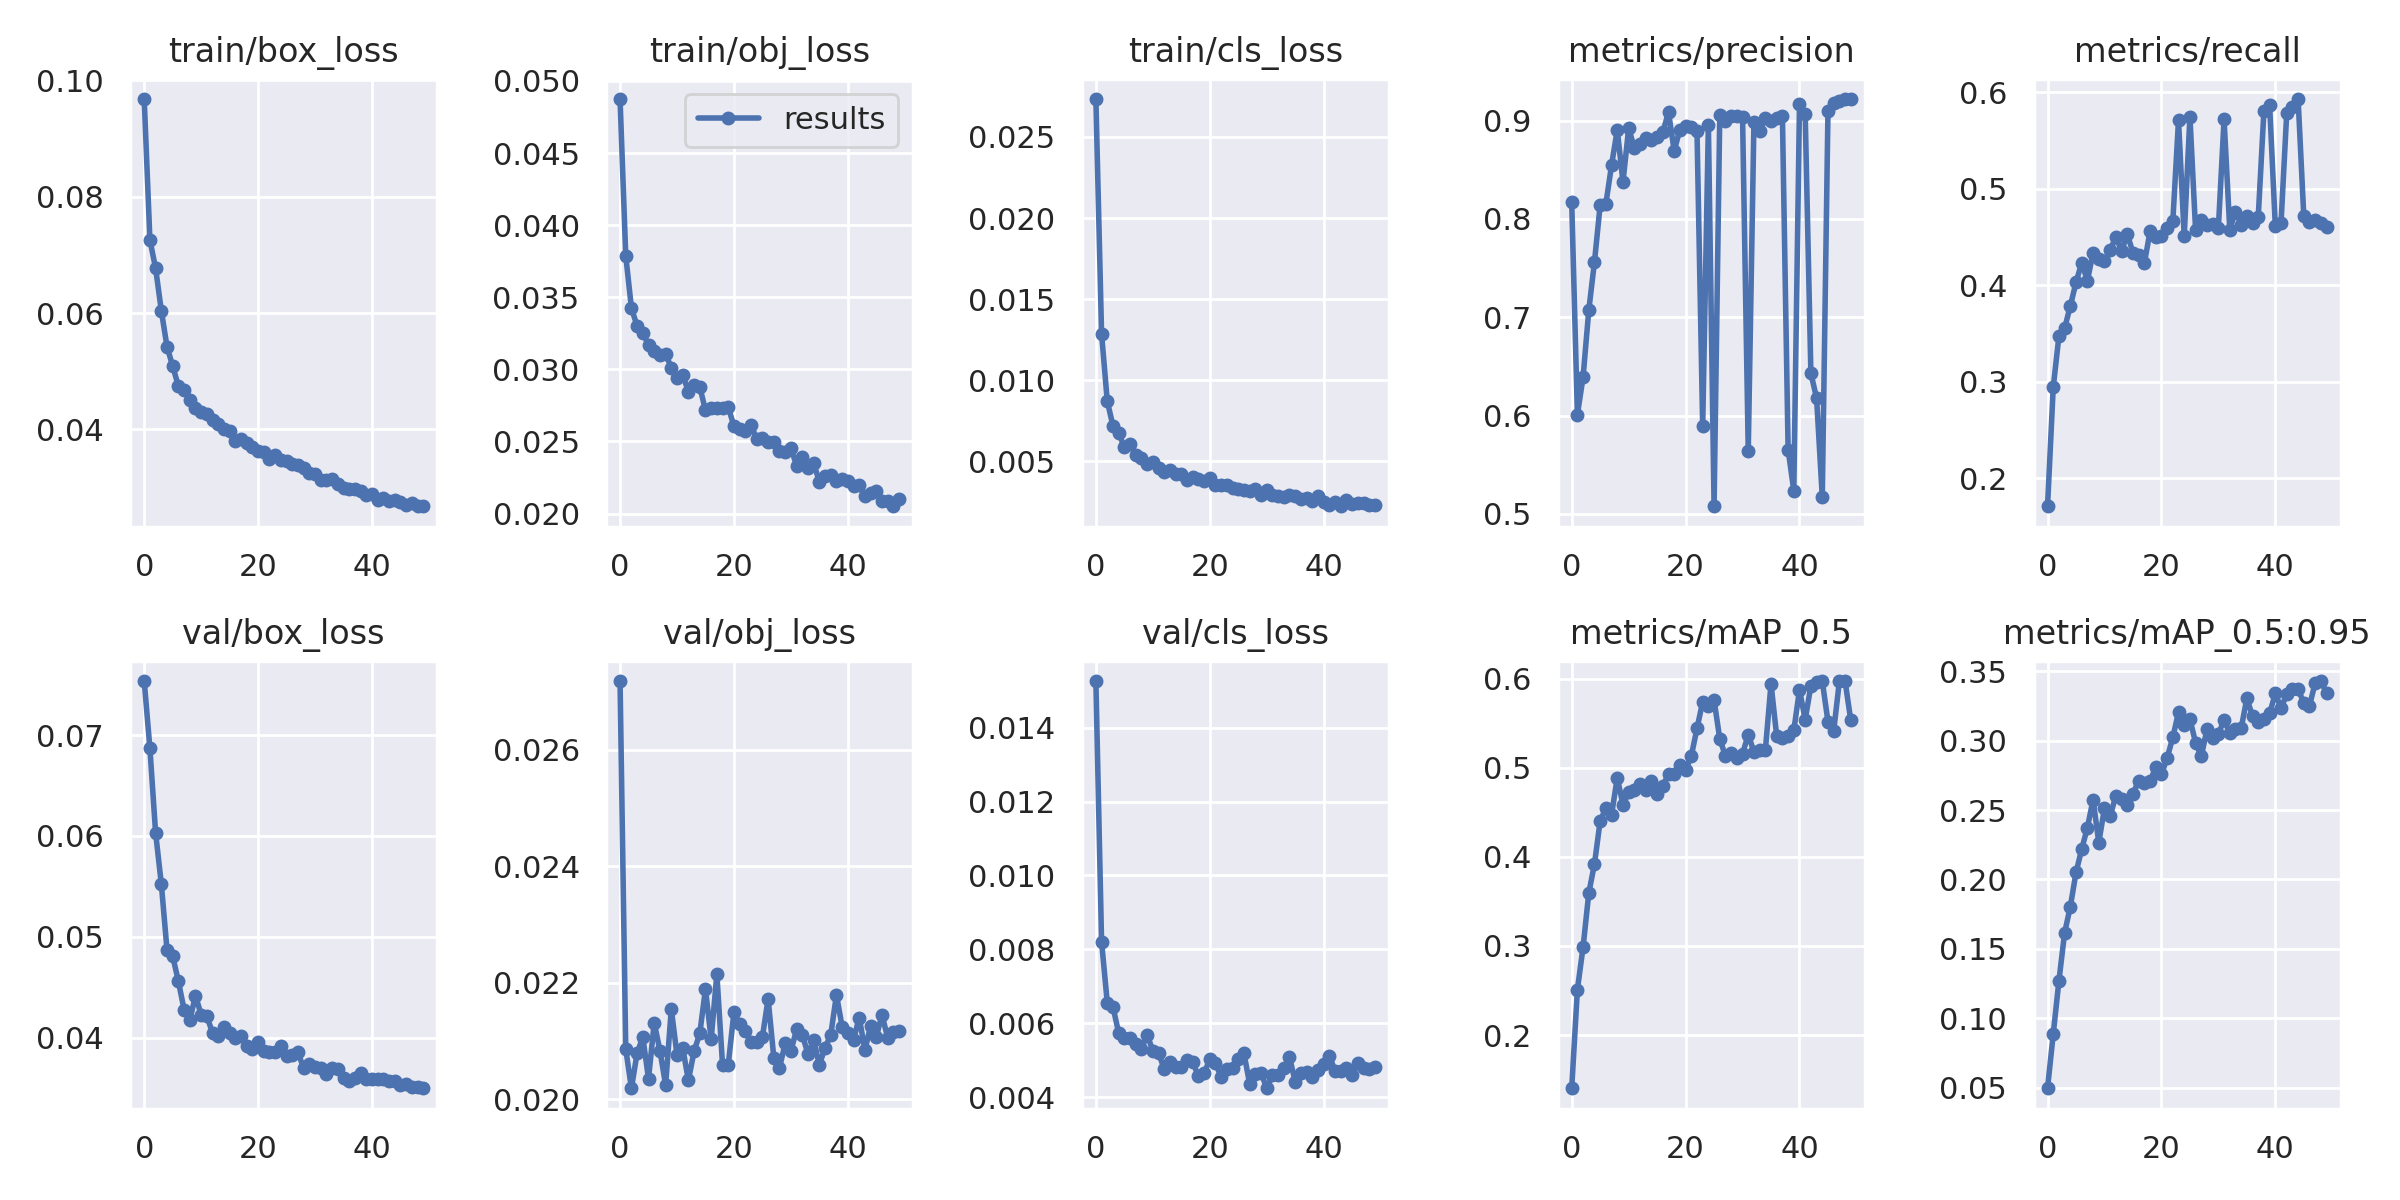

In [ ]:
Image(filename='/content/yolov5/runs/train/exp/results.png', width=1000) 

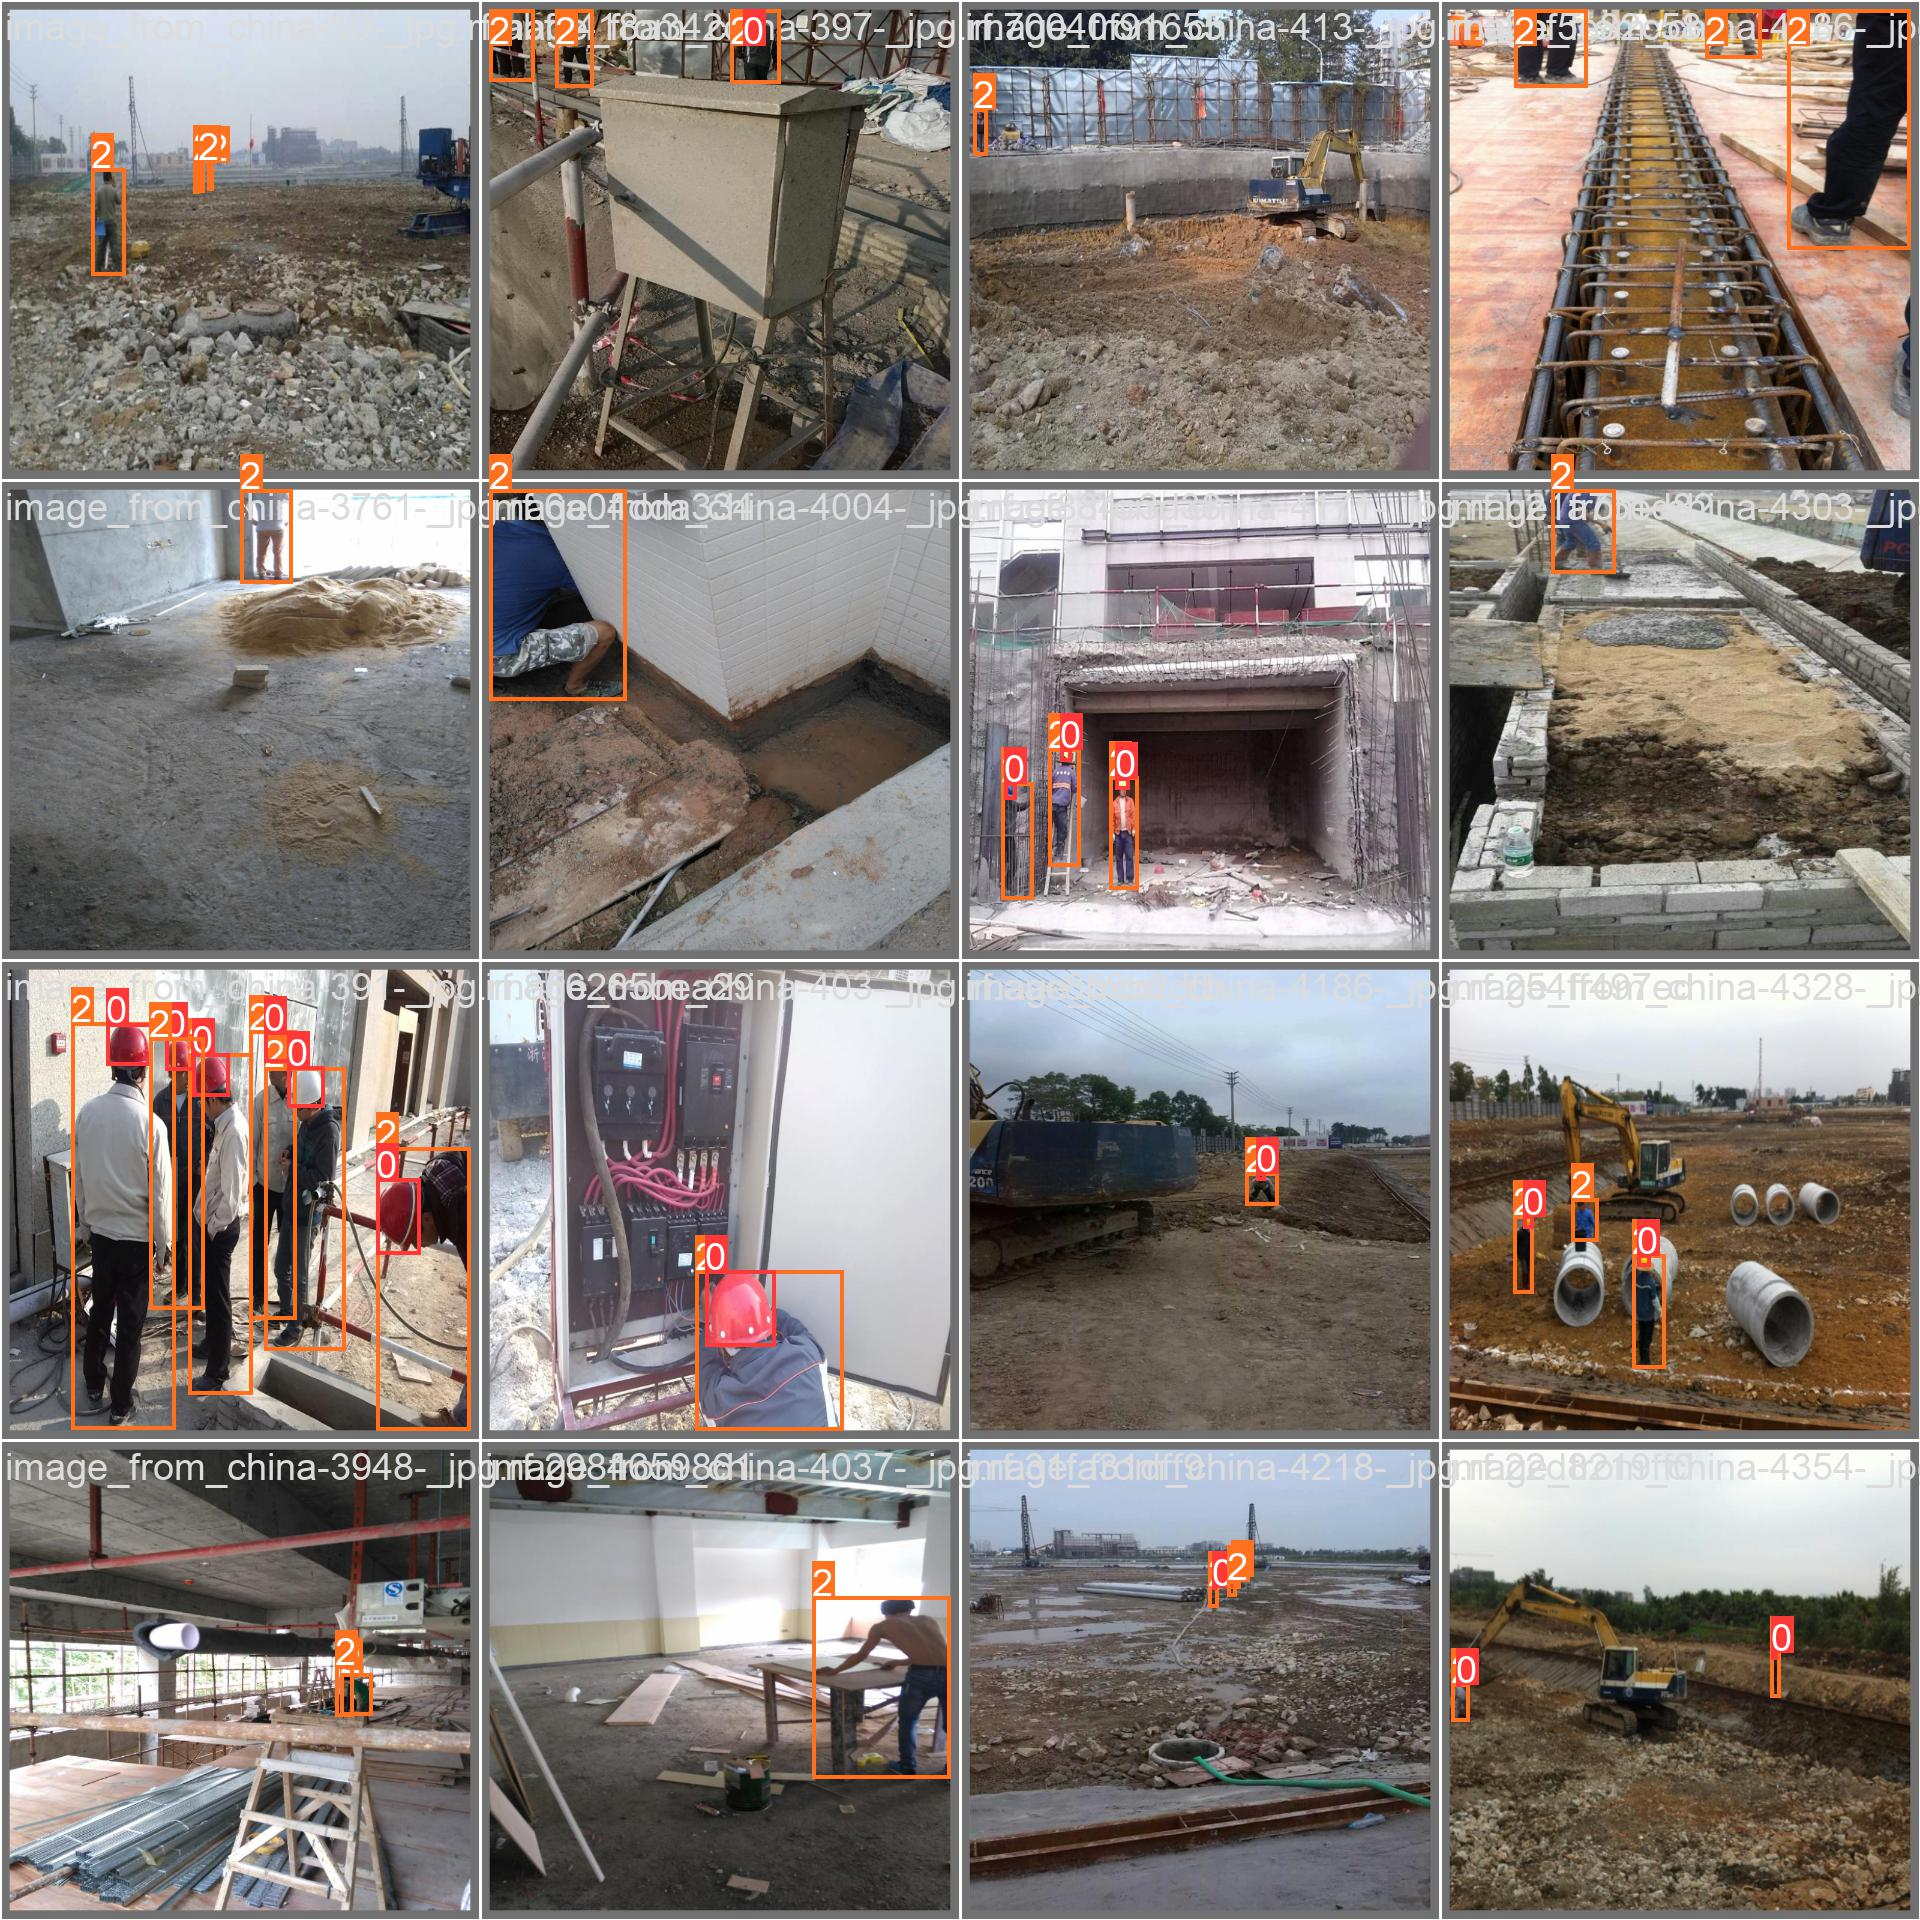

In [ ]:
Image(filename='/content/yolov5/runs/train/exp/val_batch0_labels.jpg', width=900)

<a id= '6'></a>
## 6. Conclusions

The study was conducted to evaluate the performance of four different computer vision models for object detection in the PIKTOR dataset. The models were **YOLOv8s.pt, YOLOv8m.pt, YOLOv8l.pt, and YOLOv5**, with the task being to predict the classes of Hat, Vest, and Worker with the highest Mean Average Precision (MAP) and accuracy possible. The idea was to evaluate which one of the three different YOLOv8 models was performing the best using the same hyperparameters. Some hyperparameters had been applied and modified many times to find a combination that gets the best possible relationship between score and computational time. After that hyperparameters tunning, some of them have been stablished.

The dataset has been created by using Roboflow. The images were uploaded and labeled there, and were pre-processed by flipping them horizontally and vertically, and cropping with 0% Minimum Zoom and 20% Maximum Zoom. This dataset is a bit unbalanced on Vest class, that have led to overfitting and high errors in some cases (I tried to solve that using drop out but at the end the MAP in that class was not right).

In YOLOv8 models, I decided to use some hyperparameters that compromise a bit the computational time of the model, so I priorized experimenting with hyperparameters than increasing epochs. That’s why for all of them the epochs had been 30, even though that graphically we can understand that larger epochs could give better results (both in classification and object detection tasks). In these loss function/MAP graphs we can appreciate a clear decreased tendency that do not end, so increasing epochs would be a future step with more computational resources. Regarding YOLOv5, I used 50 epochs but I experimented a bit less with its hyperparameters. In the case of YOLOv5 graphs, we can see how that curve tends to stop decreasing, so 50 epochs would be good enough.


The results showed that YOLOv8 emerged as the best model compared to YOLOv5, with the YOLOv8 models showing the highest MAP in detecting the objects of interest. The superior performance of YOLOv8 can be attributed to the advancements in its architecture and optimization techniques that have been implemented, leading to improved performance compared to its predecessors. In the training phase, the YOLOv8m.pt model performed the best overall, but YOLOv8s.pt and YOLOv8l.pt had similar MAP and were better at detecting the Vest class.

<img style="float:center" src="https://raw.githubusercontent.com/xavier-hernan/Images/main/MAP.png" width="700"/>

Overall, the YOLOv8m.pt model was found to be the most suitable for object detection in the PIKTOR dataset, with the highest MAP in identifying Hat, Vest, and Worker classes. This highlights the potential of using advanced computer vision models for real-world applications. It is important to note that the results of this study are specific to the PIKTOR dataset and the pre-processing techniques used and for the hyperparameters selected in this project, so it may not be enough to generalize to other datasets or tasks.
